In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Train.csv')
train.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [3]:
train.shape

(29451, 12)

In [4]:
test = pd.read_csv('Test.csv')
test.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0,0,1,BHK,545.171340,1,1,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1,1,2,BHK,800.000000,0,0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0,0,2,BHK,1257.096513,1,1,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0,0,3,BHK,1400.329489,1,1,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0,0,1,BHK,430.477830,1,1,"Mai Mandir,Nadiad",22.700000,72.870000


In [5]:
test.shape

(68720, 11)

In [6]:
train.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

In [7]:
test.isnull().sum()

POSTED_BY             0
UNDER_CONSTRUCTION    0
RERA                  0
BHK_NO.               0
BHK_OR_RK             0
SQUARE_FT             0
READY_TO_MOVE         0
RESALE                0
ADDRESS               0
LONGITUDE             0
LATITUDE              0
dtype: int64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
POSTED_BY                29451 non-null object
UNDER_CONSTRUCTION       29451 non-null int64
RERA                     29451 non-null int64
BHK_NO.                  29451 non-null int64
BHK_OR_RK                29451 non-null object
SQUARE_FT                29451 non-null float64
READY_TO_MOVE            29451 non-null int64
RESALE                   29451 non-null int64
ADDRESS                  29451 non-null object
LONGITUDE                29451 non-null float64
LATITUDE                 29451 non-null float64
TARGET(PRICE_IN_LACS)    29451 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [9]:
train['POSTED_BY'].value_counts()

Dealer     18291
Owner      10538
Builder      622
Name: POSTED_BY, dtype: int64

In [10]:
train['BHK_OR_RK'].value_counts()

BHK    29427
RK        24
Name: BHK_OR_RK, dtype: int64

In [11]:
train['ADDRESS'].value_counts()

Zirakpur,Chandigarh                            509
Whitefield,Bangalore                           230
Raj Nagar Extension,Ghaziabad                  215
Sector-137 Noida,Noida                         139
New Town,Kolkata                               131
Jagatpura,Jaipur                               120
Rajarhat,Kolkata                               113
Thanisandra,Bangalore                          110
Noida Extension,Noida                          107
Baner,Pune                                     101
Sector 88 Faridabad,Faridabad                  100
Sector-75 Noida,Noida                           99
Sector 86 Faridabad,Faridabad                   97
Ajmer Road,Jaipur                               96
Sector-150 Noida,Noida                          94
Sector-78 Noida,Noida                           91
Sarjapur Road,Bangalore                         89
Electronics City Phase 1,Bangalore              87
Hebbal,Bangalore                                82
Kundli,Sonipat                 

In [12]:
train['ADDRESS'] = train['ADDRESS'].apply(lambda x:x.split(',')[1])

In [13]:
test['ADDRESS'] = test['ADDRESS'].apply(lambda x:x.split(',')[1])

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29451 entries, 0 to 29450
Data columns (total 12 columns):
POSTED_BY                29451 non-null object
UNDER_CONSTRUCTION       29451 non-null int64
RERA                     29451 non-null int64
BHK_NO.                  29451 non-null int64
BHK_OR_RK                29451 non-null object
SQUARE_FT                29451 non-null float64
READY_TO_MOVE            29451 non-null int64
RESALE                   29451 non-null int64
ADDRESS                  29451 non-null object
LONGITUDE                29451 non-null float64
LATITUDE                 29451 non-null float64
TARGET(PRICE_IN_LACS)    29451 non-null float64
dtypes: float64(4), int64(5), object(3)
memory usage: 2.7+ MB


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
train['ADDRESS'] = le.fit_transform(train['ADDRESS'])

In [17]:
test['ADDRESS'] = le.fit_transform(test['ADDRESS'])

In [18]:
train = pd.get_dummies(train)

In [19]:
test = pd.get_dummies(test)

In [38]:
x_train = train.iloc[:, 0:-1].values
y_train = train.iloc[:, -1].values
x_test = test.iloc[:, :].values

In [21]:
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Dropout

In [22]:
from tensorflow.keras.models import Sequential

In [23]:
from tensorflow.keras.optimizers import Adam

In [24]:
model = Sequential()

model.add(Dense(50, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(25, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(11, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [47]:
model.fit(x_train, y_train, epochs= 20)

Train on 29451 samples
Epoch 1/20
29451/29451 [==============================] - 2s 53us/sample - loss: 0.0048 - accuracy: 0.9992
Epoch 2/20
29451/29451 [==============================] - 2s 57us/sample - loss: 0.0053 - accuracy: 0.9992
Epoch 3/20
29451/29451 [==============================] - 2s 53us/sample - loss: 0.0048 - accuracy: 0.9992
Epoch 4/20
29451/29451 [==============================] - 1s 50us/sample - loss: 0.0048 - accuracy: 0.9992
Epoch 5/20
29451/29451 [==============================] - 2s 52us/sample - loss: 0.0055 - accuracy: 0.9992
Epoch 6/20
29451/29451 [==============================] - 1s 51us/sample - loss: 0.0047 - accuracy: 0.9992
Epoch 7/20
29451/29451 [==============================] - 2s 56us/sample - loss: 0.0048 - accuracy: 0.9992
Epoch 8/20
29451/29451 [==============================] - 2s 53us/sample - loss: 0.0054 - accuracy: 0.9992
Epoch 9/20
29451/29451 [==============================] - 1s 51us/sample - loss: 0.0048 - accuracy: 0.9992
Epoch 10/20
29

In [26]:
losses = pd.DataFrame(model.history.history)

<Figure size 2016x720 with 0 Axes>

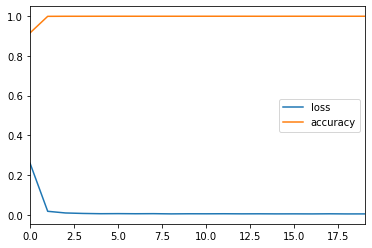

In [27]:
plt.figure(figsize= (28, 10))
losses.plot()

In [39]:
y_pred = model.predict(x_test)

In [44]:
test1 = pd.DataFrame({'TARGET(PRICE_IN_LACS)': [y_pred]})

In [45]:
test1

,TARGET(PRICE_IN_LACS)
0,"[[0.00048065186], [0.0001771748], [0.000148415..."


In [34]:
test1.to_csv('NN.csv', index= False)